In [4]:
from standardInclude import *
from fit_util import *
from omega_a_fitting import *
from pileup_correction import *
from lost_muon_calculation import *

### Lets do the wiggle fits twice, once for each binning, and see if we get different results

---

In [5]:
with open('param_dict.txt','r') as inf:
    anal_dict = eval(inf.read())
print(anal_dict)
    
analyses = anal_dict['analyses']
requiredParams = anal_dict['requiredParams']
colors = anal_dict['colors']
startTime = anal_dict['startTime']
endTime = anal_dict['endTime']

{'requiredParams': 9, 'colors': [1, 2, 3, 4, 6, 7, 9], 'startTime': 30.19, 'endTime': 650.07445, 'energyThreshold': 1710.0, 'analyses': [['Aaron', './data/aaron/UW60HourHists.root', 'THist', 1, './data/aaron/UW60HourHists.root', 'THist', 1, 30.198, 650.0], ['Nick', './data/nick/Kinnaird_histsForJosh.root', 'compareHist', 0.001, './data/nick/Kinnaird_histsForJosh.root', 'defaultHist', 0.001, 30.2, 650.0], ['David', './data/david/histograms1_60h.root', '60h_t_time1_b2', 1, './data/david/histograms1_60h.root', '60h_t_time1_b1', 1, 30.2876, 650.0644], ['Matteo', './data/matteo/europaHistograms.root', 'wiggle_plot_E1710', 1, './data/matteo/europaHistograms.root', 'wiggle_plot_E1680', 1, 30.1982, 650.0], ['Bingzhi_NoADT', './data/bingzhi/60h_to_josh_new.root', 'wiggle1700/wiggle_th1700_Josh_no5nsADT', 1, './data/bingzhi/60h_to_josh.root', 'wiggle1700/wiggle_th1700', 1, 30.3622, 650.0]]}


In [6]:
histVec = []
for i, (name, fileName, histName, scaleFactor, file2, name2, scale2, preferredStart, preferredEnd) in enumerate(analyses):
    print(i)
    f = r.TFile(fileName)
    hi = f.Get(histName).Clone("hi")
    hi.SetDirectory(0)
    hi.SetTitle(name)
    hi.SetLineColor(colors[i])
    
    #scale the axes so that they are all in microseconds
    nbins = hi.GetNbinsX()
    currentMin = hi.GetXaxis().GetBinCenter(1) - hi.GetXaxis().GetBinWidth(1)/2.0
    currentMax = hi.GetXaxis().GetBinCenter(nbins) + hi.GetXaxis().GetBinWidth(nbins)/2.0
    print(currentMin*scaleFactor, currentMax)
    hi.GetXaxis().SetLimits( currentMin*scaleFactor, currentMax*scaleFactor )
    if(scaleFactor is not 1):
        hi.GetXaxis().SetTitle("Time [#mus, Converted]")
    else:
        hi.GetXaxis().SetTitle("Time [#mus]")
    
    histVec.append( hi.Clone("hist_"+name) )
    histVec[i].SetDirectory(0)
    f.Close()
print(histVec)

0
0.05362000000000222 699.9039100000001
1
0.05362000000000001 700053.1
2
0.05362 699.9039100000001
3
0.0 700.0
4
30.19 650.0744500000001
[<ROOT.TH1D object ("hist_Aaron") at 0x7fffc6d2a2e0>, <ROOT.TH1F object ("hist_Nick") at 0x7fffc6ce9780>, <ROOT.TH1D object ("hist_David") at 0x7fffc6e8cfa0>, <ROOT.TH1D object ("hist_Matteo") at 0x7fffc6e166a0>, <ROOT.TH1D object ("hist_Bingzhi_NoADT") at 0x7fffc6ce9c20>]


In [7]:
histVec_Original = []
for i, (name, fileName, histName, scaleFactor, file2, name2, scale2, preferredStart, preferredEnd) in enumerate(analyses):
    print(i)
    f = r.TFile(file2)
    hi = f.Get(name2).Clone("hi")
    print(f, name2)

    hi.SetDirectory(0)
    hi.SetTitle(name)
    hi.SetLineColor(colors[i])
    
    #scale the axes so that they are all in microseconds
    nbins = hi.GetNbinsX()
    currentMin = hi.GetXaxis().GetBinCenter(1) - hi.GetXaxis().GetBinWidth(1)/2.0
    currentMax = hi.GetXaxis().GetBinCenter(nbins) + hi.GetXaxis().GetBinWidth(nbins)/2.0
    print(currentMin*scale2, currentMax)
    hi.GetXaxis().SetLimits( currentMin*scale2, currentMax*scale2 )
    if(scale2 is not 1):
        hi.GetXaxis().SetTitle("Time [#mus, Converted]")
    else:
        hi.GetXaxis().SetTitle("Time [#mus]")
    
    histVec_Original.append( hi.Clone("hist_Original_"+name) )
    histVec_Original[i].SetDirectory(0)
    f.Close()
print(histVec_Original)

0
<ROOT.TFile object ("./data/aaron/UW60HourHists.root") at 0x7fffc6e61c90> THist
0.05362000000000222 699.9039100000001
1
<ROOT.TFile object ("./data/nick/Kinnaird_histsForJosh.root") at 0x7fffc70468f0> defaultHist
0.0 699897.2
2
<ROOT.TFile object ("./data/david/histograms1_60h.root") at 0x7fffc6e61c90> 60h_t_time1_b1
0.0 699.8972000000001
3
<ROOT.TFile object ("./data/matteo/europaHistograms.root") at 0x7fffc70468f0> wiggle_plot_E1680
0.0 700.0
4
<ROOT.TFile object ("./data/bingzhi/60h_to_josh.root") at 0x7fffc6e61c90> wiggle1700/wiggle_th1700
0.0 671.4000000000001
[<ROOT.TH1D object ("hist_Original_Aaron") at 0x7fffc70387c0>, <ROOT.TH1F object ("hist_Original_Nick") at 0x7fffc70383d0>, <ROOT.TH1D object ("hist_Original_David") at 0x7fffc12c0b50>, <ROOT.TH1D object ("hist_Original_Matteo") at 0x7fffc12c06f0>, <ROOT.TH1D object ("hist_Original_Bingzhi_NoADT") at 0x7fffc12c0f40>]


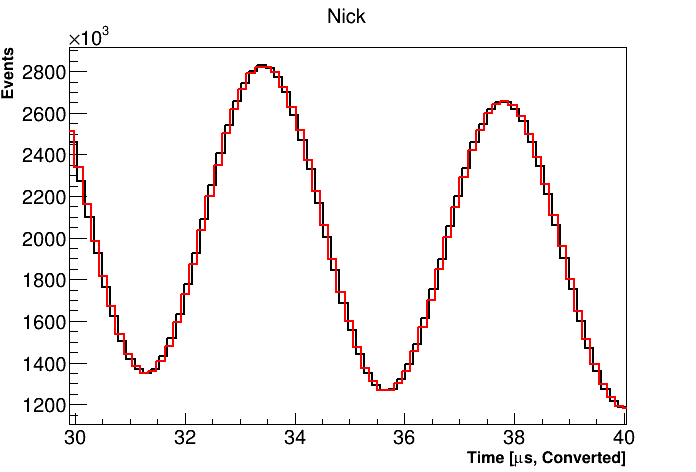

In [8]:
c = r.TCanvas()
i = 1

histVec[i].Draw()
histVec[i].GetXaxis().SetRangeUser(30,40)
histVec[i].SetLineColor(1)
histVec_Original[i].Draw("SAME")
histVec_Original[i].SetLineColor(2)

c.Draw()

---

### Create a function which will do the fit an spit back the parameters

In [9]:
def doWiggleFit(whichAnal, fitOpt = "REMB", nFit = 2, t1 = startTime, t2 = endTime):
    wiggle = MakeWiggleFromTH1(whichAnal, anal_dict['energyThreshold'], 6000., 0, 1, False)
    DumpClass(wiggle)
    fitFunc = WiggleFit(GetBlindingPhrase("./blinding.txt"), "5par")
    #DumpClass(fitFunc)
    fit = BuildTF1(fitFunc, 5, "5par", "five_parameter_fit", t1, t2)
    fit.SetParameters([7000000,64.4,0.33,-33,0])
    fit.SetParNames()

    fitter = WiggleFitter(wiggle.h, fit, "5par", fitOpt, nFit)
    fitter.Fit(2)

    fitter.ComputeFFT()

    #get the important parameters
    npar = 5
    fitname = "5par_fitter"

    
    #parsi = [fitter.GetParameter(i) for i in range(npar) ]
    #errsi = [fitter.GetParError(i) for i in range(npar)]
    #parnames = [fitter.GetParName(i) for i in range(npar)]
    #chisqi = [fitter.GetChisquare(), fitter.GetNDF()]
    
    return (fitter, fit, fitFunc, wiggle)

In [10]:
parVec = []
chiSqVec = []

for i, hi in enumerate(histVec):
    print("Starting:", hi)
    ding = doWiggleFit(hi,"REMBQ")
    parVec.append( ding[0].DumpParameters() )
    chiSqVec.append( ding[0].DumpChiSquare() )

Starting: <ROOT.TH1D object ("hist_Aaron") at 0x7fffc6d2a2e0>
Dumping:  <omega_a_fitting.MakeWiggleFromTH1 object at 0x7f53e6019668>
Class:  <class 'omega_a_fitting.MakeWiggleFromTH1'>
    elow = 1710.0
    ehigh = 6000.0
    timeScaleFactor = 1
    caloNum = 0
    isPileupCorrected = False
    BinOrEnergy = energy
    title = Wiggle Plot for [1710.0 < E (MeV) < 6000.0] in Calo 0
    h = <ROOT.TH1D object ("wiggle_1710.0_6000.0_0") at 0x7fffc7059e70>
Starting fit 1 / 2
Parameters from this fit: 
     ChiSq/NDF =  9578.545540059282 / 4150 = 2.308083262664887
      N  =  3472630.7260851404 +/- 203.2273047973741
      #tau_{#mu}  =  64.3035195226615 +/- 0.0021169677309872408
      A  =  0.36960586687227365 +/- 4.365842373478685e-05
      R  =  -55.760509271239414 +/- 1.3296616504193688
      #phi_{a}  =  -1.0502102809763159 +/- 0.0002183408916572171
Starting fit 2 / 2
Parameters from this fit: 
     ChiSq/NDF =  9578.54554005905 / 4150 = 2.3080832626648315
      N  =  3472630.725580461 +/

Warning in <TF1::AddToGlobalList>: Function is supposed to be in the global list but it is not present
Warning in <TF1::AddToGlobalList>: Function is supposed to be in the global list but it is not present
Warning in <TF1::AddToGlobalList>: Function is supposed to be in the global list but it is not present
Warning in <TF1::AddToGlobalList>: Function is supposed to be in the global list but it is not present
Warning in <TROOT::Append>: Replacing existing TH1: out_MAG P (Potential memory leak).
Warning in <TF1::AddToGlobalList>: Function is supposed to be in the global list but it is not present
Warning in <TF1::AddToGlobalList>: Function is supposed to be in the global list but it is not present
Warning in <TROOT::Append>: Replacing existing TH1: out_MAG P (Potential memory leak).
Warning in <TF1::AddToGlobalList>: Function is supposed to be in the global list but it is not present
Warning in <TF1::AddToGlobalList>: Function is supposed to be in the global list but it is not present
Wa

In [11]:
parVec_Original = []
chiSqVec_Original = []

for i, hi in enumerate(histVec_Original):
    print("Starting:", hi)
    if(analyses[i][7] is not None):
        print("Using custom times:",analyses[i][7], analyses[i][8])
        ding = doWiggleFit(hi,"REMBQ", 2, analyses[i][7], analyses[i][8])
    else:
        print("No custom times")
        ding = doWiggleFit(hi,"REMBQ", 2, startTime, endTime)
    parVec_Original.append( ding[0].DumpParameters() )
    chiSqVec_Original.append( ding[0].DumpChiSquare() )

Starting: <ROOT.TH1D object ("hist_Original_Aaron") at 0x7fffc70387c0>
Using custom times: 30.198 650.0
Dumping:  <omega_a_fitting.MakeWiggleFromTH1 object at 0x7f53e52ae128>
Class:  <class 'omega_a_fitting.MakeWiggleFromTH1'>
    elow = 1710.0
    ehigh = 6000.0
    timeScaleFactor = 1
    caloNum = 0
    isPileupCorrected = False
    BinOrEnergy = energy
    title = Wiggle Plot for [1710.0 < E (MeV) < 6000.0] in Calo 0
    h = <ROOT.TH1D object ("wiggle_1710.0_6000.0_0") at 0x7fffc1ecf5f0>
Starting fit 1 / 2
Parameters from this fit: 
     ChiSq/NDF =  9578.545540059282 / 4150 = 2.308083262664887
      N  =  3472630.7260851404 +/- 203.2273047973741
      #tau_{#mu}  =  64.3035195226615 +/- 0.0021169677309872408
      A  =  0.36960586687227365 +/- 4.365842373478685e-05
      R  =  -55.760509271239414 +/- 1.3296616504193688
      #phi_{a}  =  -1.0502102809763159 +/- 0.0002183408916572171
Starting fit 2 / 2
Parameters from this fit: 
     ChiSq/NDF =  9578.54554005905 / 4150 = 2.3080832

Warning in <TF1::AddToGlobalList>: Function is supposed to be in the global list but it is not present
Warning in <TF1::AddToGlobalList>: Function is supposed to be in the global list but it is not present
Warning in <TROOT::Append>: Replacing existing TH1: out_MAG P (Potential memory leak).
Warning in <TF1::AddToGlobalList>: Function is supposed to be in the global list but it is not present
Warning in <TF1::AddToGlobalList>: Function is supposed to be in the global list but it is not present
Warning in <TROOT::Append>: Replacing existing TH1: out_MAG P (Potential memory leak).
Warning in <TF1::AddToGlobalList>: Function is supposed to be in the global list but it is not present
Warning in <TF1::AddToGlobalList>: Function is supposed to be in the global list but it is not present
Warning in <TROOT::Append>: Replacing existing TH1: out_MAG P (Potential memory leak).
Warning in <TF1::AddToGlobalList>: Function is supposed to be in the global list but it is not present
Warning in <TF1::A

In [12]:
print(parVec)
print(parVec_Original)

[[(3472630.725580461, 203.22585504622424), (64.30351950841876, 0.00211695334220726), (0.36960586705372195, 4.3658431755650554e-05), (-55.76050809135108, 1.3296480318204464), (-1.0502102800906798, 0.00021833927727075384)], [(3478112.6524865422, 203.5275823431139), (64.27572553785993, 0.002115917730750286), (0.3691929806181415, 4.364330395240307e-05), (-55.73120600263959, 1.3310171071245642), (-1.0502253665532595, 0.00021856346685944099)], [(3426563.2081140126, 201.72512770629797), (64.3330203248183, 0.0021304478458964555), (0.37076742845039273, 4.3920723277273603e-05), (-55.11988920346321, 1.333404262990511), (-1.050654772402659, 0.00021891750467613498)], [(3428799.6012854553, 201.94853648383025), (64.25320787126961, 0.002130026384594354), (0.37159733049842697, 4.3922766475917834e-05), (-55.43637226147758, 1.3306923358734433), (-1.0503102597726943, 0.00021830584022530138)], [(3453429.525439772, 202.80117969056755), (64.27579927244359, 0.0021234292752797114), (0.36920107772958227, 4.3798

In [13]:
parnames = ['N', 'tau', 'A', 'R', 'phi','Chi2/NDF']
npar=5

In [14]:
parsByAnal = [[] for i in range(npar)]
errsByAnal = [[] for i in range(npar)]
for i, pars in enumerate(parVec):
    for j, pari in enumerate(pars):
        parsByAnal[j].append(pari[0])
        errsByAnal[j].append(pari[1])

parsByAnal.append([x/y for (x,y) in chiSqVec])
errsByAnal.append([0 for (x,y) in chiSqVec])

In [15]:
parsByAnal_Original = [[] for i in range(npar)]
errsByAnal_Original = [[] for i in range(npar)]
for i, pars in enumerate(parVec_Original):
    for j, pari in enumerate(pars):
        parsByAnal_Original[j].append(pari[0])
        errsByAnal_Original[j].append(pari[1])

parsByAnal_Original.append([x/y for (x,y) in chiSqVec_Original])
errsByAnal_Original.append([0 for (x,y) in chiSqVec_Original])

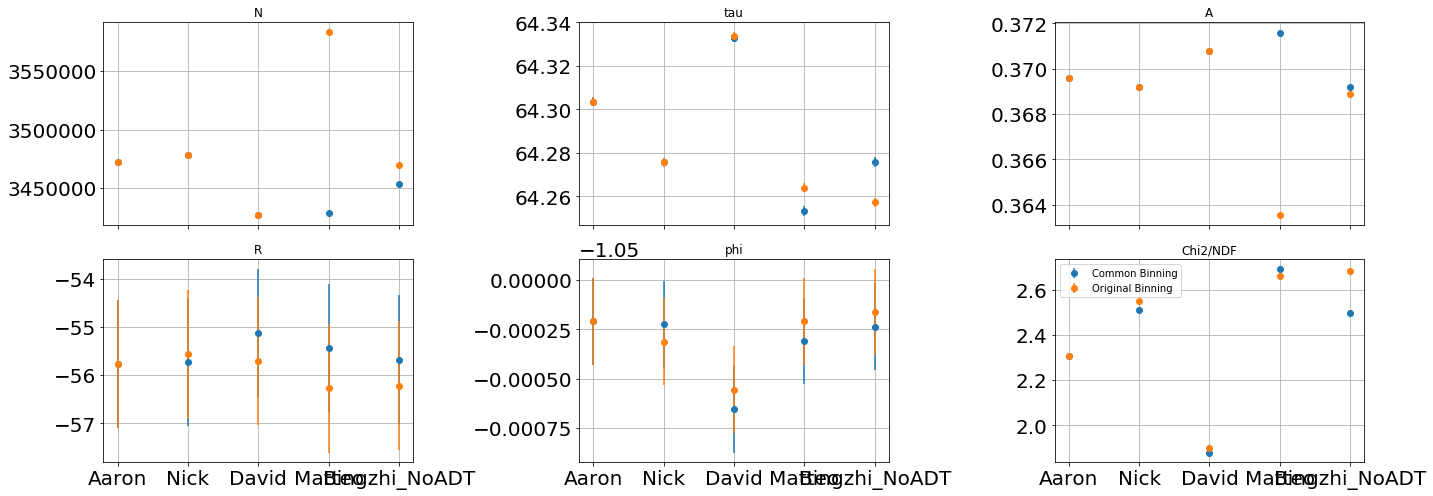

In [16]:
names = [x[0] for x in analyses]
fig,axs = plt.subplots(2, int(npar/1.4), figsize=(20,7), sharex=True)
ax = flatten2dArray(axs)
for i, pari in enumerate(parsByAnal):
    ax[i].errorbar([x for x in range(len(names))], pari, yerr=errsByAnal[i], fmt="o",label="Common Binning")
    ax[i].errorbar([x for x in range(len(names))], parsByAnal_Original[i], yerr=errsByAnal_Original[i], fmt="o", label="Original Binning")
    ax[i].grid()
    ax[i].set_title(parnames[i])
    
plt.xticks([i for i in range(len(names))], names)

plt.tight_layout()
plt.legend()
plt.show()

In [17]:
for i in range(npar):
    print(parsByAnal[i])
    print(parsByAnal_Original[i])
    print("********************")

[3472630.725580461, 3478112.6524865422, 3426563.2081140126, 3428799.6012854553, 3453429.525439772]
[3472630.725580461, 3478351.7248997246, 3426712.4278211547, 3583591.1458458286, 3469967.600038359]
********************
[64.30351950841876, 64.27572553785993, 64.3330203248183, 64.25320787126961, 64.27579927244359]
[64.30351950841876, 64.27569735177681, 64.33364318147149, 64.26385212599435, 64.25722003262196]
********************
[0.36960586705372195, 0.3691929806181415, 0.37076742845039273, 0.37159733049842697, 0.36920107772958227]
[0.36960586705372195, 0.36920234259101037, 0.3707759534679082, 0.36355146153793577, 0.3688946458099621]
********************
[-55.76050809135108, -55.73120600263959, -55.11988920346321, -55.43637226147758, -55.67673440753861]
[-55.76050809135108, -55.555521650698196, -55.70894126392163, -56.27509873351331, -56.21844214386392]
********************
[-1.0502102800906798, -1.0502253665532595, -1.050654772402659, -1.0503102597726943, -1.05023756953525]
[-1.05021028

In [18]:
parDiffs_ByAnal = []
for i in range(len(parsByAnal)):
    pari = parsByAnal[i]
    parj = parsByAnal_Original[i]
    diff = [(x-y)/x for (x,y) in zip(pari,parj)]
    parDiffs_ByAnal.append( diff )
    
print(parDiffs_ByAnal)

[[0.0, -6.873624780710773e-05, -4.3547921949534635e-05, -0.04514452944474854, -0.004788884347214557], [0.0, 4.38518318974423e-07, -9.681756740713879e-06, -0.00016566106311865242, 0.0002890549791980398], [0.0, -2.5357938423442613e-05, -2.2992897599178235e-05, 0.021652117225113537, 0.0008299865252413937], [-0.0, 0.00315235151977639, -0.010686742462127639, -0.015129533874974663, -0.009729517043154027], [-0.0, -8.233125886292027e-05, 9.460454730476073e-05, 9.551000591476693e-05, 7.15824503140986e-05], [0.0, -0.014866246540094403, -0.010688343294354922, 0.01286322154424496, -0.07419940266219353]]


[0.0, -6.873624780710773e-05, -4.3547921949534635e-05, -0.04514452944474854, -0.004788884347214557]
[0.0, 4.38518318974423e-07, -9.681756740713879e-06, -0.00016566106311865242, 0.0002890549791980398]
[0.0, -2.5357938423442613e-05, -2.2992897599178235e-05, 0.021652117225113537, 0.0008299865252413937]
[-0.0, 0.00315235151977639, -0.010686742462127639, -0.015129533874974663, -0.009729517043154027]
[-0.0, -8.233125886292027e-05, 9.460454730476073e-05, 9.551000591476693e-05, 7.15824503140986e-05]
[0.0, -0.014866246540094403, -0.010688343294354922, 0.01286322154424496, -0.07419940266219353]


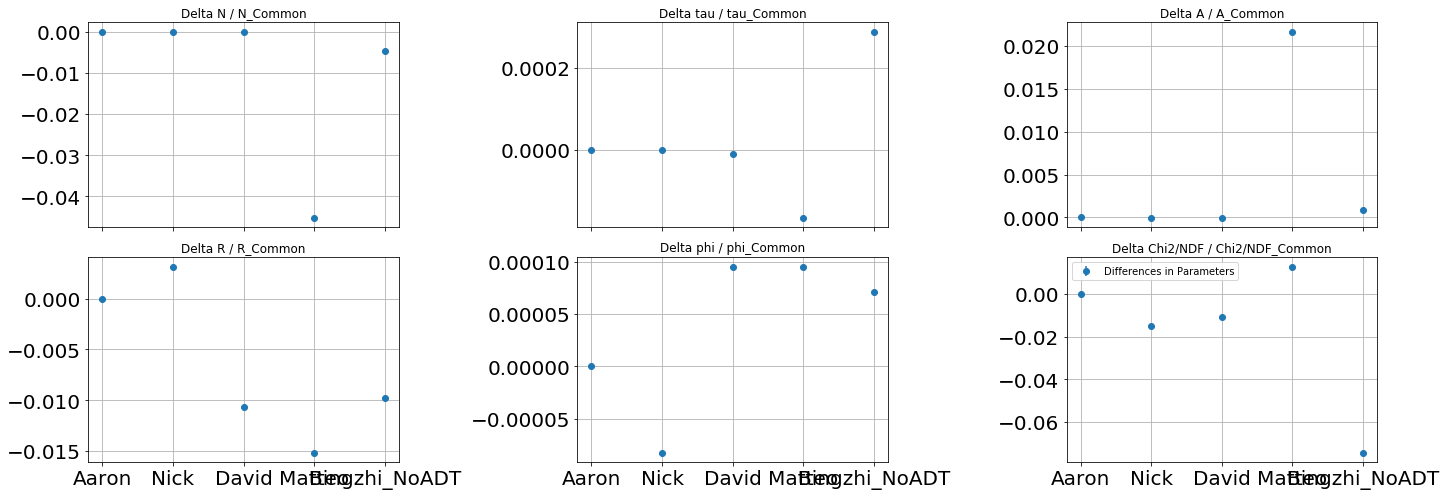

In [19]:
fig,axs = plt.subplots(2, int(npar/1.4), figsize=(20,7), sharex=True)
ax = flatten2dArray(axs)
for i, pari in enumerate(parDiffs_ByAnal):
    print(pari)
    ax[i].errorbar([x for x in range(len(names))], pari, yerr=0, fmt="o",label="Differences in Parameters")
    ax[i].grid()
    ax[i].set_title("Delta "+parnames[i]+" / "+parnames[i]+"_Common")
    
plt.xticks([i for i in range(len(names))], names)

plt.tight_layout()
plt.legend()
plt.show()

[0.0, -6.873624780710773e-05, -4.3547921949534635e-05, -0.04514452944474854, -0.004788884347214557]
[0.0, 4.38518318974423e-07, -9.681756740713879e-06, -0.00016566106311865242, 0.0002890549791980398]
[0.0, -2.5357938423442613e-05, -2.2992897599178235e-05, 0.021652117225113537, 0.0008299865252413937]
[-0.0, 0.00315235151977639, -0.010686742462127639, -0.015129533874974663, -0.009729517043154027]
[-0.0, -8.233125886292027e-05, 9.460454730476073e-05, 9.551000591476693e-05, 7.15824503140986e-05]
[0.0, -0.014866246540094403, -0.010688343294354922, 0.01286322154424496, -0.07419940266219353]


No handles with labels found to put in legend.


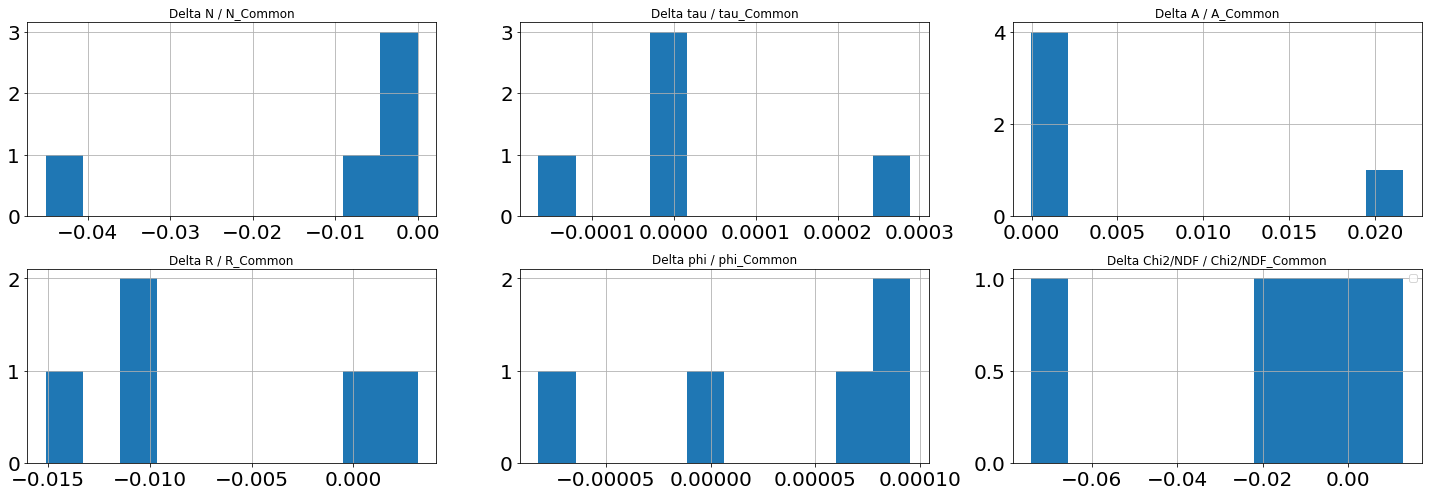

In [20]:
fig,axs = plt.subplots(2, int(npar/1.4), figsize=(20,7), sharex=False)
ax = flatten2dArray(axs)
for i, pari in enumerate(parDiffs_ByAnal):
    print(pari)
    ax[i].hist(pari)
    ax[i].grid()
    ax[i].set_title("Delta "+parnames[i]+" / "+parnames[i]+"_Common")
    
#plt.xticks([i for i in range(len(names))], names)

plt.tight_layout()
plt.legend()
plt.show()

---

### Just test to make sure we get a reasonable chissq when we do this by hand